In [3]:
library(tidyverse)
library(stringr)
library(lubridate)
options(repr.plot.width=4, repr.plot.height=3)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.2.0     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




## Problem 1: March Madness

This month is [March Madness](https://en.wikipedia.org/wiki/NCAA_Division_I_men%27s_basketball_tournament). The following dataset contains March Madness results for the years 1985&mdash;2016:

In [4]:
ncaa <- read_csv("https://datasets.stats306.org/ncaa.csv.gz")

Rows: 2050 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): Date, Round, Region, Winner, Loser, Overtime
dbl (4): Winning Seed, Winning Score, Losing Seed, Losing Score

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


(Note: this table is missing some data for various years, teams and rounds. For this exercise, assume the data are complete, and do not worry about any missing entries.)

**1(a)** (2 pts) In 1985, Michigan made it to the Round of 32, before losing to Villanova. In 1989 Michigan won the national championship. Michigan also advanced to the national championship, but did not win, in 1992, 1993, and 2013.

Make a plot showing how far Michigan advanced each year. In years where Michigan did not make the tournament at all, your plot should have a missing entry. Use a different color, fill, or marker to indicate years where Michigan won the national championship. 

Hints: 

- The same plot for Villanova could look like:

![villanova](http://www-personal.umich.edu/~jonth/images/hw8/villanova.png)

- To find the furthest, i.e. _maximum_, round reached each year, convert `Round` to an ordered factor, and use `group_by` and `summarize` along with an appropriate summary function.

In [48]:
library(repr)

In [3]:
# YOUR SOLUTION HERE 
torny_levels=c ("Opening Round","Round of 64","Round of 32","Sweet Sixteen","Elite Eight","National Semifinals","National Championship")

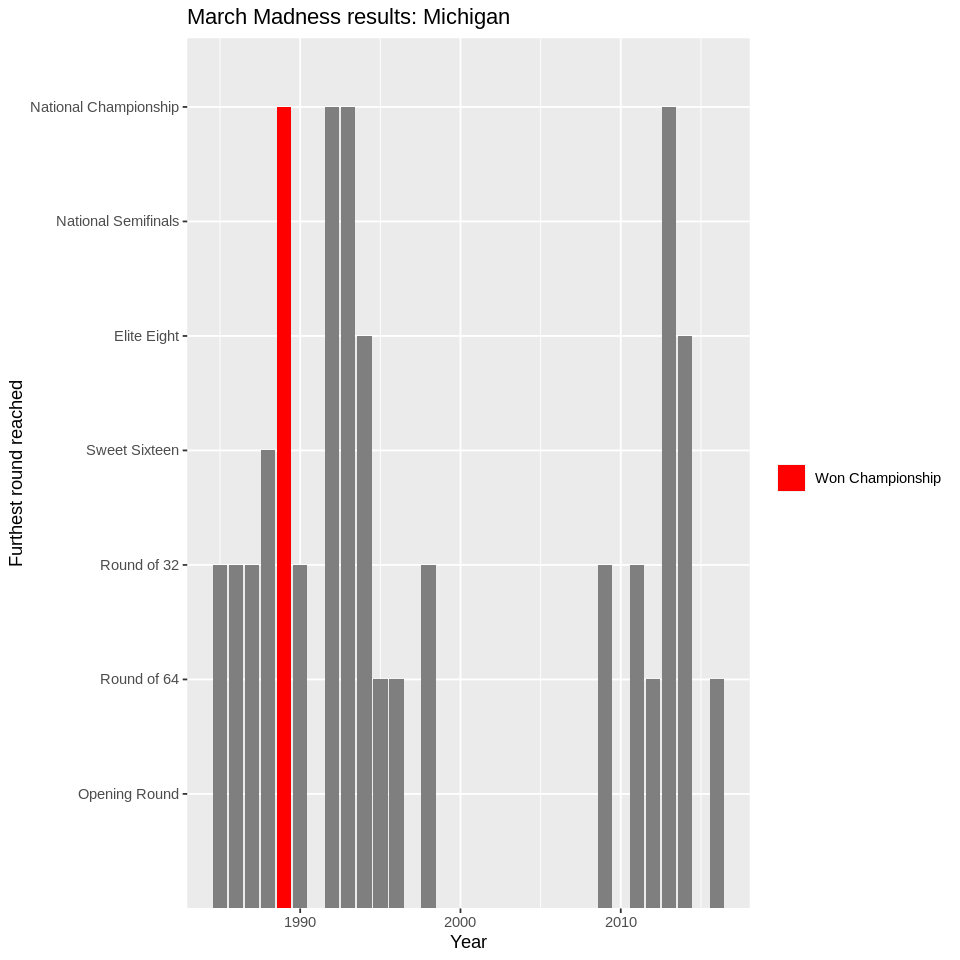

In [53]:
ncaa%>%
  filter(Loser == 'Michigan' | Winner == 'Michigan') %>%
  mutate(Round = factor(Round, levels = torny_levels, ordered = T)) %>%
  mutate(year = year(mdy(Date))) %>%
  mutate(michigan_won_championship =ifelse((Winner == 'Michigan' & Round == 'National Championship'), 1, 0))  %>%
  group_by(year) %>%
  summarize(farthest_round = max(Round), `Won Championship` = ifelse((sum(michigan_won_championship) == 1), 'Won Championship', NA)) %>%
  ggplot(aes(x = year,y = farthest_round, fill = `Won Championship`)) +
  geom_col(orientation = "x") + 
  scale_fill_manual(values = 'red',limits = 'Won Championship') +
  scale_y_discrete(drop = F) +
  labs(fill = NULL, x = "Year", y = "Furthest round reached", title = "March Madness results: Michigan")

**1(b)** (2 points)
A [_Cinderella story_](https://www.ncaa.com/news/basketball-men/article/2021-03-01/11-greatest-march-madness-cinderella-stories) is a low-seeded team that goes deep in the NCAA tournament. For example, in 1986, the number 11 seed, Lousiana State, beat the number 6, 3, 2, and 1 seeds in succession, before ultimately losing in the semifinals:

```
# A tibble: 5 × 6
  Date       Round               Winner          `Winning Seed` Loser    Losin…¹
  <date>     <chr>               <chr>                    <dbl> <chr>      <dbl>
1 1986-03-13 Round of 64         Louisiana State             11 Purdue         6
2 1986-03-15 Round of 32         Louisiana State             11 Memphis        3
3 1986-03-20 Sweet Sixteen       Louisiana State             11 Georgia…       2
4 1986-03-22 Elite Eight         Louisiana State             11 Kentucky       1
5 1986-03-29 National Semifinals Louisville                   2 Louisia…      11
# … with abbreviated variable name ¹​`Losing Seed`
```

Define a team's "Cinderella index" to be the difference in seeding between the winning and losing team for each game that the team _won_. For example, the Cinderella index for the 1986 Louisiana State team shown above is $5 + 8 + 9 + 10 = 32$.

Make a plot showing the top ten teams with the highest Cinderella index.

Hint: the team with the highest Cinderella index is Lousiana State, 1986. The team with the second-highest is Villanova, 1985. There are actually 12 teams in the top 10 due to some ties.

`summarise()` has grouped output by 'Winner'. You can override using the
`.groups` argument.


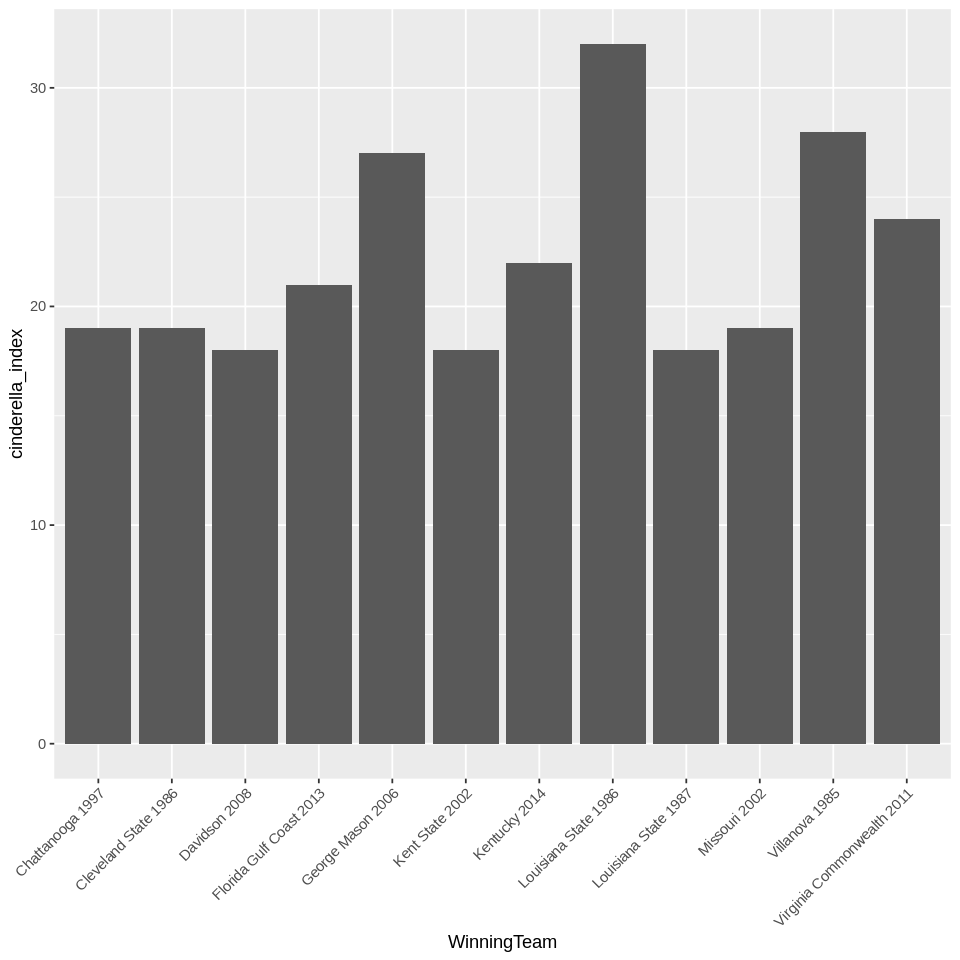

In [65]:
# YOUR SOLUTION HERE 
ncaa %>%
  mutate(year = year(mdy(Date))) %>%
  mutate(cinderella_score = `Winning Seed` - `Losing Seed`) %>%
  group_by(Winner, year) %>%
  summarize(cinderella_index = sum(cinderella_score)) %>%
  arrange(-cinderella_index) %>%
  unite(col = 'WinningTeam', c('Winner', 'year'), sep = " ")   %>%
  head(12) %>%
  ggplot(aes(x = WinningTeam, y = cinderella_index)) +
  geom_col() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))
 

  

## Problem 2
The file `tweets.txt.gz` contains tweets from June, 2009. The file is in a special format. The first few lines are:

In [24]:
download.file("https://github.com/stats306/w23/tree/main/homeworks/hw8/tweets.txt.gz", "tweets.txt.gz")


In [25]:
readLines("tweets.txt.gz", n = 11) %>% writeLines








<!DOCTYPE html>
<html lang="en" data-color-mode="auto" data-light-theme="light" data-dark-theme="dark" data-a11y-animated-images="system">
  <head>
    <meta charset="utf-8">


Each datum consists of a triple of lines marked `T`, `U` and `W` containing the time of the tweet, the user, and the message itself, respectively. Each triple is separated by an empty line.

**2(a) (0.5 point)**
Read `tweets.txt.gz` in and store it as an R data frame/tibble called `tweets1`. It should have two character columns and 1.03m rows:
```{r}
# A tibble: 1,039,879 × 2
   X1    X2                                                                     
   <chr> <chr>                                                                  
 1 T     "2009-06-11 00:00:03"                                                  
 2 U     "http://twitter.com/imdb"                                              
 3 W     "No Post Title"                                                        
 4 T     "2009-06-11 16:37:14"                                                  
 5 U     "http://twitter.com/ncruralhealth"                                     
 6 W     "No Post Title"                                                        
 7 T     "2009-06-11 16:56:23"                                                  
 8 U     "http://twitter.com/boydjones"                                         
 9 W     "listening to \"Big Lizard - The Dead Milkmen\" ♫ http://blip.fm/~81kw…
10 T     "2009-06-11 16:56:59"                                                  
# … with 1,039,869 more rows
```
(**Hint**: The `.gz` file extension indicates that this file is compressed to save space. You can load the table using the **usual `tidyverse` table loading commands**, as if it were a regular text file.

In [26]:
# YOUR SOLUTION HERE 
url <- "https://raw.githubusercontent.com/stats306/w23/main/homeworks/hw8/tweets.txt.gz"
tweets1 <- read_tsv(url, col_names = FALSE)
tweets1

Rows: 1039879 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): X1, X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2
<chr>,<chr>
T,2009-06-11 00:00:03
U,http://twitter.com/imdb
W,No Post Title
T,2009-06-11 16:37:14
U,http://twitter.com/ncruralhealth
W,No Post Title
T,2009-06-11 16:56:23
U,http://twitter.com/boydjones
W,"listening to ""Big Lizard - The Dead Milkmen"" ♫ http://blip.fm/~81kwz"


**2(b) (0.5 point)**
Next, convert `tweets1` so that it has three columns reflecting the three variables present in this data set. Store the resulting table in a variable called `tweets2`. The first rows of `tweets2` will now look like:
```
# A tibble: 3 x 3
  T                   U                                W                       
  <chr>               <chr>                            <chr>                   
1 2009-06-11 00:00:03 http://twitter.com/imdb          No Post Title           
2 2009-06-11 16:37:14 http://twitter.com/ncruralhealth No Post Title           
3 2009-06-11 16:56:23 http://twitter.com/boydjones     "listening to \"Big Liz…
```
(*Hint*: If you are having trouble getting this working on the full data set, try subsetting the table to a small number of rows in order to debug your code. Most likely you will use a function which requires each tripplet T, U, W to have the same row index.)

In [69]:
tweets2 <- tweets1 %>%
  mutate(row=ceiling(row_number()/3))%>%
  pivot_wider(names_from=X1,values_from=X2) %>%
  select(-row)

tweets2

T,U,W
<chr>,<chr>,<chr>
2009-06-11 00:00:03,http://twitter.com/imdb,No Post Title
2009-06-11 16:37:14,http://twitter.com/ncruralhealth,No Post Title
2009-06-11 16:56:23,http://twitter.com/boydjones,"listening to ""Big Lizard - The Dead Milkmen"" ♫ http://blip.fm/~81kwz"
2009-06-11 16:56:59,http://twitter.com/cameron987,@beatrizchavez A dork? NO way... you are. I just have no shame... I #squarespace want #squarespace that #squarespace iPhone #squarespace.
2009-06-11 16:57:03,http://twitter.com/selenato,@okaaaa 本当ね！2週間楽しみがありすぎわ、まじで…本当きどうさんへの愛がこんな形になるとは…イナズマ大人のアニメだわ＞＜
2009-06-11 16:57:30,http://twitter.com/nbeasley10,Just got a chance to buy All-Star tickets tomorrow. God Bless the Cardinals
2009-06-11 16:57:31,http://twitter.com/littlewing333,@kidhum and if an act has pull and they don't promote the show...how will their people ever know the show exists?
2009-06-11 16:57:33,http://twitter.com/lolcute,mebbe U fetch http://tinyurl.com/nz4fbr
2009-06-11 16:57:36,http://twitter.com/fr0st22,"I have broken 1,000 twitter updates. Paaaartaaaay!"


**2(c) (0.5 point)**
Convert the `T` column to a properly formatted `datetime` object and give it (and the rest of the columns) an appropriate name. Also, strip off the leading `http://twitter.com/` from each user. Store the resulting table as `tweets3`. It will look like:
```
# A tibble: 346,627 × 3
   time                user          tweet                                      
   <dttm>              <chr>         <chr>                                      
 1 2009-06-11 00:00:03 imdb          "No Post Title"                            
 2 2009-06-11 16:37:14 ncruralhealth "No Post Title"                            
 3 2009-06-11 16:56:23 boydjones     "listening to \"Big Lizard - The Dead Milk…
 4 2009-06-11 16:56:59 cameron987    "@beatrizchavez A dork? NO way... you are.…
 5 2009-06-11 16:57:03 selenato      "@okaaaa 本当ね！2週間楽しみがありすぎわ、…
 6 2009-06-11 16:57:30 nbeasley10    "Just got a chance to buy All-Star tickets…
 7 2009-06-11 16:57:31 littlewing333 "@kidhum and if an act has pull and they d…
 8 2009-06-11 16:57:33 lolcute       "mebbe U fetch http://tinyurl.com/nz4fbr"  
 9 2009-06-11 16:57:36 fr0st22       "I have broken 1,000 twitter updates. Paaa…
10 2009-06-11 16:57:59 mavellsyrup   "Food timmeeee :'D"                        
# … with 346,617 more rows
```

In [72]:
library(magrittr)

In [110]:
# YOUR SOLUTION HERE

tweets3 <- tweets2 %>%
  set_colnames(c("time", "user", "tweet")) %>%
  mutate(time = as.POSIXct(time, format = "%Y-%m-%d %H:%M:%S")) %>%
  mutate(user = str_remove(user, "http://twitter.com/"))

tweets3

time,user,tweet
<dttm>,<chr>,<chr>
2009-06-11 00:00:03,imdb,No Post Title
2009-06-11 16:37:14,ncruralhealth,No Post Title
2009-06-11 16:56:23,boydjones,"listening to ""Big Lizard - The Dead Milkmen"" ♫ http://blip.fm/~81kwz"
2009-06-11 16:56:59,cameron987,@beatrizchavez A dork? NO way... you are. I just have no shame... I #squarespace want #squarespace that #squarespace iPhone #squarespace.
2009-06-11 16:57:03,selenato,@okaaaa 本当ね！2週間楽しみがありすぎわ、まじで…本当きどうさんへの愛がこんな形になるとは…イナズマ大人のアニメだわ＞＜
2009-06-11 16:57:30,nbeasley10,Just got a chance to buy All-Star tickets tomorrow. God Bless the Cardinals
2009-06-11 16:57:31,littlewing333,@kidhum and if an act has pull and they don't promote the show...how will their people ever know the show exists?
2009-06-11 16:57:33,lolcute,mebbe U fetch http://tinyurl.com/nz4fbr
2009-06-11 16:57:36,fr0st22,"I have broken 1,000 twitter updates. Paaaartaaaay!"


**2(d) (1 point)**
Create a plot that shows the tweet volume for each day of June 2009. For what **day of the month** was there the largest volume of tweets? Can you give an explanation for what caused this spike?

*Hint*: Try reading tweets on the day of highest volume around 11:00PM, and/or Google the date.

In [145]:
# YOUR SOLUTION HERE 

june2009 <- tweets3 %>%
  filter(month(time) == 6 && year(time) == 2009) %>%
  mutate(day  = day(time)) %>%
  group_by(day) %>%
  summarise(tweetVolume = n()) %>%
  arrange(-tweetVolume)

Warning message:
“There were 2 warnings in `filter()`.
The first warning was:
ℹ In argument: `month(time) == 6 && year(time) == 2009`.
Caused by warning in `month(time) == 6 && year(time) == 2009`:
! 'length(x) = 346627 > 1' in coercion to 'logical(1)'
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”


In [146]:
june2009

day,tweetVolume
<int>,<int>
25,23031
12,22457
30,22302
15,20892
29,20580
27,20469
13,19427
26,19313
14,18929


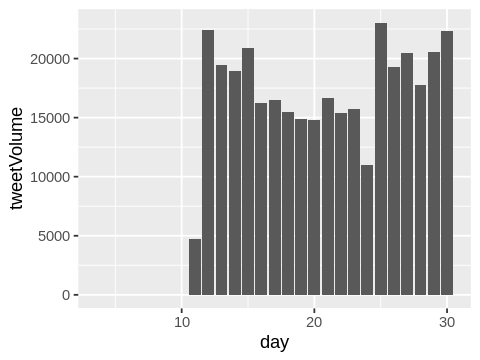

In [147]:
june2009 %>%
  ggplot(aes(x=day, y = tweetVolume)) +
  geom_col()

June 25th 2009 is the day with the largest volume of tweets at 23031 tweets. A reason for this may be due to the fact that both actress Farrah Fawcett and pop superstar Michael Jackson died 12 hours apart on that day. 

**2(e) (1 points)** One of the reason for the spike in 2(d) was related to a public figure in the music industry. On the day of highest volume in 2(d), what is the percentage of tweets that mentioned either **their first or last name**?

In [ ]:
 mutate(michigan_won_championship =ifelse((Winner == 'Michigan' & Round == 'National Championship'), 1, 0)) 

In [175]:
# YOUR SOLUTION HERE 

tweets3 %>%
  filter(month(time) == 6 && year(time) == 2009) %>%
  filter(day(time) == 25) %>%
  mutate(tweet = str_to_lower(tweet)) %>%
  mutate(MJ = ifelse((str_detect(tweet, "michael") | str_detect(tweet, "jackson")), 1, 0)) %>%
  mean(MJ)

Warning message:
“There were 2 warnings in `filter()`.
The first warning was:
ℹ In argument: `month(time) == 6 && year(time) == 2009`.
Caused by warning in `month(time) == 6 && year(time) == 2009`:
! 'length(x) = 346627 > 1' in coercion to 'logical(1)'
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”
Warning message in mean.default(., MJ):
“argument is not numeric or logical: returning NA”


[1] NA

# Challenge Problem: Writing a function

(2 points) A few weeks ago, the university announced that it was pushing the start of the winter semester [back by one week](https://www.michigandaily.com/news/administration/board-of-regents-approves-extended-winter-break/) to January 10, 2024. Assume that the winter semester will always begin on the second Wednesday in January. Write a function called `winter_start_date(year)` which takes a year and returns the date on which winter classes will commence:

    > winter_start_date(2024)
    2024-01-10
    > winter_start_date(3024)
    3024-01-14

In [44]:
library(glue)

In [97]:
# YOUR SOLUTION HERE 

winter_start_date <- function(year) {
  jan_first_date <- as.Date(paste(year, "-01-01", sep = ""))
  first_day_of_week <- weekdays(jan_first_date)
  to_wedns <- match("Wednesday", weekdays(seq(jan_first_date, by = "day", length.out = 7))) + 7
  return(format(jan_first_date + to_wedns -1, "%Y-%m-%d"))
}